<a href="https://colab.research.google.com/github/lakummahesh/Unsupervised-ML-Capstone-Project-Netflix-Movies-and-TV-Shows-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unsupervised Clustering Problem**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

### <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Variables**

**Attribute Information**
1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Release year of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genre

12. description: The Summary description

# **Approach**

The approach to form clusters and recommend movies and TV shows from the available data will be done in the following steps:

1. Pre- Processing:\
Mount the drive and import the data.
>1.1 View the data\
> 1.2 Clean the data
>>  1.2.1 Find and drop the irrelevant/ redundant features.\
  1.2.2 Find and deal with the missing values in the dataset.
2. Performing EDA (Exploratory Data Analysis)
3. Performing NLP (Natural Language Processing)
4. Model Training\
Here, we have trained the  following clustering models with our data to draw out the final conclusion.
>  4.1. K-means Clustering
>> 4.1.1. Silhouette Method\
   4.1.2. Elbow Method\
   4.1.3. Dendogram
>
> 4.2. Aglomerative Clustering
5. Conclusion

# **Pre- Processing**

## **Mount the drive and import the data**


In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/Colab Notebooks/Unsupervised-ML-Capstone-Project-Netflix-Movies-and-TV-Shows-Clustering-Mahesh-Lakum/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'
data = pd.read_csv(path)

## **Viewing the data**

In [4]:
df = data.copy()

In [5]:
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [6]:
df.tail(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7777,s7778,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
7778,s7779,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
7779,s7780,TV Show,Zona Rosa,NaN,"Manu NNa, Ana Julia Yeyé, Ray Contreras, Pablo...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,"International TV Shows, Spanish-Language TV Sh...",An assortment of talent takes the stage for a ...
7780,s7781,Movie,Zoo,Shlok Sharma,"Shashank Arora, Shweta Tripathi, Rahul Kumar, ...",India,"July 1, 2018",2018,TV-MA,94 min,"Dramas, Independent Movies, International Movies",A drug dealer starts having doubts about his t...
7781,s7782,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [8]:
df.shape

(7787, 12)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


In [10]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# To check for duplicate entries.
df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

Here, show_id and title have count equal to the number of total rows. Hence, there are no duplicate entries in this dataset.

## **Cleaning the data**

Here, we will do the following:
1. Find and drop the irrelevant/ redundant features.
2. Find and deal with the missing values in the dataset.

In [12]:
# Dealing with the missing values in the dataset
df['director'].fillna('Data unavailable', inplace=True)
df['cast'].fillna('Data unavailable', inplace=True)
df['country'].fillna('Data unavailable', inplace=True)
df.dropna(subset = ['date_added'], inplace=True)
df.dropna(subset = ['rating'], inplace=True)

In [13]:
df.shape

(7770, 12)

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Hence, we replaced the null data in the 'director', 'cast' and 'country'   columns by 'Data unavailable' and dropped the seven null entries in 'rating' and 10 null entries in 'date_added' column.

# **EDA (Exploratory Data Analysis)**

## **Number of Movies & TV Shows**

In [15]:
# Firstly looking at the percentage of types of content in the data. i.e. movies and TV shows.
df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

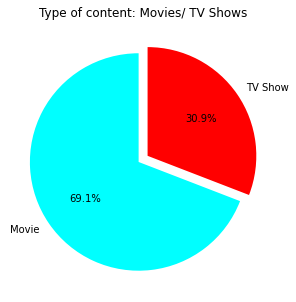

In [16]:
# plotting a pie chart of the above count
plt.figure(figsize=(5,5))
plt.title('Type of content: Movies/ TV Shows')
plt.pie(df['type'].value_counts(), explode=(0.05,0.05),
        labels = df['type'].value_counts().index, colors=['cyan','red'],
        autopct='%1.1f%%', startangle=90)
plt.show()

Here, we see that of the total content included in this data, the majority of the data corresponds to Movies. TV Shows have about one third the weightage in the data.

## **Content released per year**

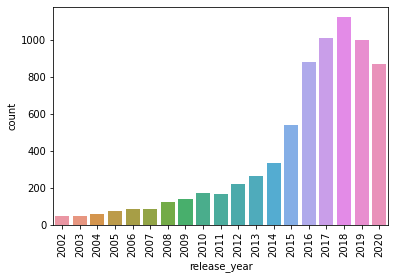

In [17]:
# Plotting the countplot of number of movies and tv shows as per their release year
year_order = list(range(0,2022))
plot_release_year = sns.countplot(data = df, x = 'release_year', order = year_order[-20:-1])
plot_release_year.set_xticklabels(plot_release_year.get_xticklabels(), rotation=90)
plt.show()

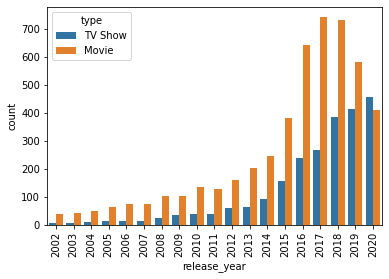

In [18]:
# Viewing the same above data for movies and TV shows individually
year_order = list(range(0,2022))
plot_release_year1 = sns.countplot(data = df, x = 'release_year', hue = 'type',
                                  order = year_order[-20:-1])
plot_release_year1.set_xticklabels(plot_release_year1.get_xticklabels(), rotation=90)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


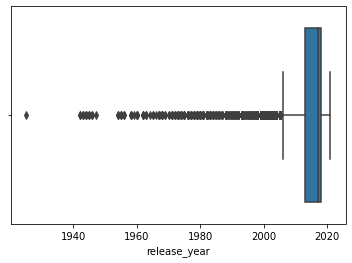

In [19]:
# Box plot graph to show the outliers on release_year column.
# Note: This step is just to view the outliers.
# We need not drop these outliers as we are trying to cluster the content.
# Hence, release date is irrelevant in that case.
sns.boxplot(df.release_year)

As we have seen earlier, before 2014 the production growth for Movies & Tv Shows were very less ,that's why here it's showing those values(release_year less than 2009) as outliers.

1. From the graph to content released per year, we observe that it followed a steady growth till the year 2014. From the year 2015, it just put out an exponential growth.
2. We also observe that in the same year, the production of TV shows also shot up. Uptil then it was almost half that of the number of movies produced. Eventually in the year 2020 we see that TV shows surpassed the total count of movies produced.


## **Content added to Netflix per year**

In [20]:
df['date_added'].value_counts

<bound method IndexOpsMixin.value_counts of 0          August 14, 2020
1        December 23, 2016
2        December 20, 2018
3        November 16, 2017
4          January 1, 2020
               ...        
7782      October 19, 2020
7783         March 2, 2019
7784    September 25, 2020
7785      October 31, 2020
7786         March 1, 2020
Name: date_added, Length: 7770, dtype: object>

In [21]:
# Extracting the date data from the date_added column. 
df['added_year'] = pd.DatetimeIndex(df['date_added']).year
df['added_month'] = pd.DatetimeIndex(df['date_added']).month
df['added_day'] = pd.DatetimeIndex(df['date_added']).day
df['added_weekday'] = pd.DatetimeIndex(df['date_added']).weekday

In [22]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year,added_month,added_day,added_weekday
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,2020,10,19,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,2019,3,2,5
7784,s7785,Movie,Zulu Man in Japan,Data unavailable,Nasty C,Data unavailable,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",2020,9,25,4
7785,s7786,TV Show,Zumbo's Just Desserts,Data unavailable,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,2020,10,31,5
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Data unavailable,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...,2020,3,1,6


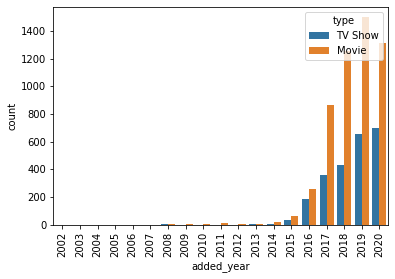

In [23]:
# Plotting the countplot of number of movies and tv shows as per added year
year_order = list(range(0,2022))
plot_added_year2 = sns.countplot(data = df, x = 'added_year', hue = 'type',
                                  order = year_order[-20:-1])
plot_added_year2.set_xticklabels(plot_added_year2.get_xticklabels(), rotation=90)
plt.show()

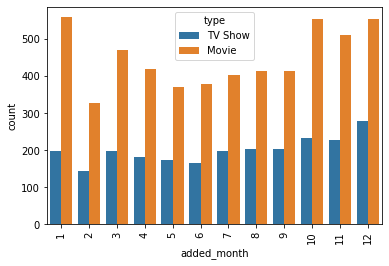

In [24]:
# Plotting the countplot of number of movies and tv shows as per added monthwise
plot_added_month = sns.countplot(data = df, x = 'added_month', hue = 'type')
plot_added_month.set_xticklabels(plot_added_month.get_xticklabels(), rotation=90)
plt.show()

1. Looking at the data in the ‘added_year’ column, we see that till the year 2015, quite less amount of movies were added to Netflix. This started rising from the year 2015. Looking at this and the previous plots we can deduce that Netflix did sponsor a lot of these productions. Thus, adding a humongous amount of data.
2. Looking at the month wise distribution of the data added to the platform, we observe that the  number of movies and TV shows added, observed a downward trend from the month of March till July. A reason to speculate could be the fiscal year. The headquarters of Netflix is located in Los Gatos, California, U.S., where the fiscal year is from July to June.

## **Country of Origin**

In [25]:
df.country.value_counts()

United States                                                   2546
India                                                            923
Data unavailable                                                 505
United Kingdom                                                   396
Japan                                                            224
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 682, dtype: int64

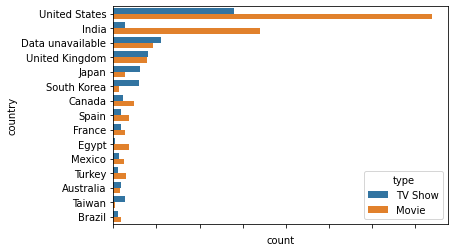

In [26]:
# Plotting the countplot of top countries producing the movies and tv shows
list_order = df.country.value_counts().index[:15]
plot_country = sns.countplot(data = df, y = 'country', hue = 'type',
                                  order = list_order)
plot_country.set_xticklabels(plot_country.get_xticklabels(), rotation=90)
plt.show()

1. Majority of the content is produced in the USA, followed by India, UK and Japan. Also, a lot of the data seems to lack information on the country of origin hence that ambiguity holds true while still not affecting the outcome of our observation.
2. The UK, Japan and South Korea are the only countries where the total number of TV shows produced is more than the number of movies produced.
3. Of all the top content producer nations, India appears to have the least contribution for TV Shows.


## **Top Directors**

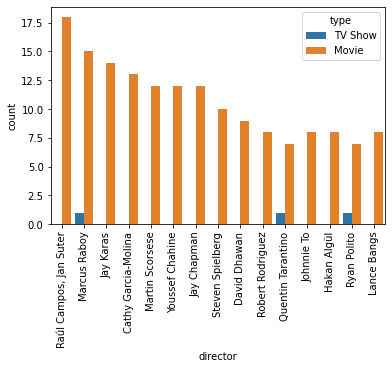

In [27]:
# Plotting the countplot of top directors producing the movies and tv shows
# Here, we have not seperated the director names  inorder to keep the data intact.
list_order1 = df.director.value_counts().index[1:16]
plot_director = sns.countplot(data = df, x = 'director', hue = 'type',
                                  order = list_order1)
plot_director.set_xticklabels(plot_director.get_xticklabels(), rotation=90)
plt.show()

Of the top directors with the majority of content in the dataset, we observe that “Raul Campos” and “Jan Sulter” top the list with their contribution to movies only. Among these top 15 directors only three directors namely, “Marcus Raboy”, “Quentin Tarantino” and “Ryan Polito” are found to have contributed for both movies and TV shows.

## **Top Ratings**

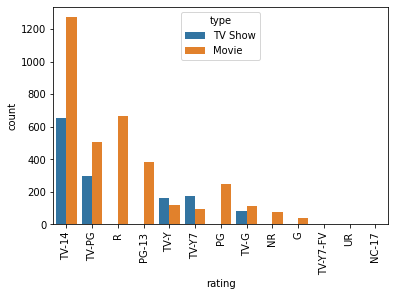

In [28]:
# Plotting the countplot of ratings for the movies and tv shows
list_order2 = df.rating.value_counts().index[1:16]
plot_rating = sns.countplot(data = df, x = 'rating', hue = 'type',
                                  order = list_order2)
plot_rating.set_xticklabels(plot_rating.get_xticklabels(), rotation=90)
plt.show()

Observation:
1. TV Shows do no have ratings: 'R', 'PG-13', 'PG', 'NR' and 'G'.
2. The maximum content in the dataset has a rating of 'TV-14' followed by 'TV-PG' & 'R'.
3. 'TV-Y7-FV', 'UR' and 'NC-17' seem to have less or almost no content listed with them.

Meaning of these ratings:\
TV-14 -> Content unsuitable for children under the age of 14 years.\
TV-PG -> Content unsuitable for younger children.\
R -> Content restricted for viewers under the age of 17 years.\
PG-13 -> Parental guidance for children under 13.

## **Content vs. Target Age Group**

In [29]:
# Trying to draw out the age group from the ratings. Thus we can get a better idea about the target audience.
df['age_group'] = df['rating']
MR_age = {'TV-MA': 'Adults', 'R': 'Adults', 'PG-13': 'Teens',
          'TV-14': 'Young Adults', 'TV-PG': 'Older Kids',
          'NR': 'Adults', 'TV-G': 'Kids', 'TV-Y': 'Kids',
          'TV-Y7': 'Older Kids', 'PG': 'Older Kids',
          'G': 'Kids', 'NC-17': 'Adults', 'TV-Y7-FV': 'Older Kids',
          'UR': 'Adults'}
df['age_group'] = df['age_group'].map(MR_age)

In [30]:
# Age group for movies
movie_age_groups = df.query('type == "Movie"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

# Age group for TV Shows
tvshow_age_groups = df.query('type == "TV Show"').groupby('age_group').agg({'age_group': 'count'}).rename(columns = {'age_group': 'content'}).reset_index()

In [31]:
# Plot the pie chart to get the proportion of age group wrt content produced
import plotly.express as px
colors = ['#A10115', '#D72C16', '#F0EFEA', '#C0B2B5', '#221f1f']

fig = px.pie(labels=movie_age_groups['age_group'],values = movie_age_groups['content'],title='Movies',names = movie_age_groups['age_group'], width = 550, height = 550,hole=0.4)
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)
fig.show()

fig2 = px.pie(labels=tvshow_age_groups['age_group'],values = tvshow_age_groups['content'],title='TV Shows',names = tvshow_age_groups['age_group'], width = 550, height = 550,hole=0.4)
fig2.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
              marker=dict(colors=colors, line=dict(color='#000000', width=2)),showlegend = False)
fig2.show()

## **Age Group of Target Audience  vs. Country of Origin**

In [32]:
df['count'] = 1

# There are multiple country names mentioned at certain instance.
# We will extract the first name from them and consider that as a primary producer. 
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])
# Using short forms form the US and UK
df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK',inplace=True)

In [33]:
# Grouping the first country
data = df.groupby('first_country')[['first_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['first_country']

netflix_heatmap = df.loc[df['first_country'].isin(data)]
netflix_heatmap = pd.crosstab(netflix_heatmap['first_country'], netflix_heatmap['age_group'],normalize = "index").T
netflix_heatmap

first_country,Canada,Data unavailable,France,India,Japan,Mexico,South Korea,Spain,UK,USA
age_group,,,,,,,,,,
Adults,0.467181,0.318812,0.627551,0.259414,0.365957,0.764228,0.463918,0.797619,0.526042,0.488518
Kids,0.150579,0.170297,0.086735,0.015690,0.008511,0.016260,0.046392,0.035714,0.078125,0.074809
Older Kids,0.220077,0.235644,0.112245,0.163180,0.276596,0.089431,0.123711,0.053571,0.184028,0.196242
Teens,0.027027,0.005941,0.030612,0.004184,0.012766,0.016260,0.000000,0.017857,0.071181,0.098469
Young Adults,0.135135,0.269307,0.142857,0.557531,0.336170,0.113821,0.365979,0.095238,0.140625,0.141962


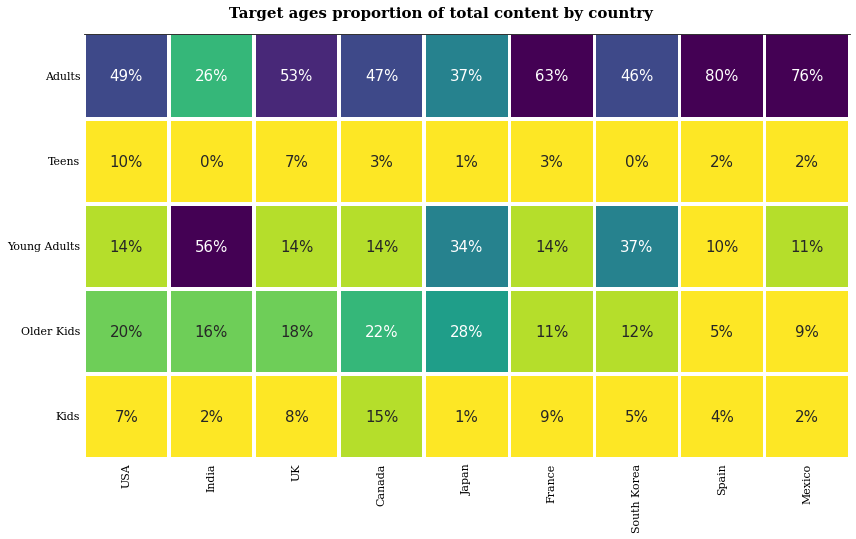

In [34]:
import matplotlib
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
# Plotting the heatmap

cmap = px.colors.sequential.Viridis_r
fig, ax = plt.subplots(1, 1, figsize=(12, 12))
country_order2 = ['USA', 'India', 'UK', 'Canada', 'Japan', 'France', 'South Korea', 'Spain','Mexico']
age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(netflix_heatmap.loc[age_order,country_order2],cmap=cmap,square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='2.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":15})

ax.spines['top'].set_visible(True)

fig.text(.76,.765, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

We see that the proportion of target audience based on the type of content produced by the USA, UK and France is nearly the same. A similar trait was observed for India and Japan. Apparently the cultural beliefs of these two groups are quite closely similar and this is reflected in the type of content produced.

## **Top Genres**

In [35]:
df['Listed_in'] = df['listed_in'].apply(lambda x : x.split(',')) 

In [36]:
list_genre = []
for i in df['Listed_in']:
  list_genre +=i                                                                     

for i in range(len(list_genre)): 
  list_genre[i] = list_genre[i].strip()

genres_dict = {}
for genre in  list_genre:
  if genre in genres_dict:
    genres_dict[genre] +=1
  else:
    genres_dict[genre] = 1

genres_dict = dict(sorted(genres_dict.items(), key=lambda item: item[1],reverse=True))

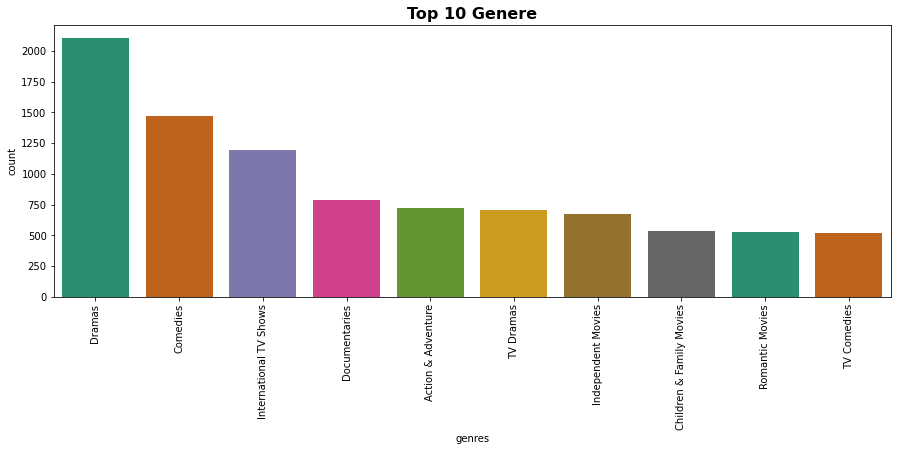

In [37]:
# Top 10 genres on netflix
df_genre_count = pd.DataFrame(genres_dict.values(),genres_dict.keys()).reset_index().rename(columns={'index':'genres', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='genres',y='count',data=df_genre_count,palette="Dark2")
plt.title("Top 10 Genere",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

The most popular genre is ‘Drama’ followed by ‘Comedy’ and ‘International TV Shows’.

## **Number of categories each movie holds**

In [38]:
# Creating a column for no. of categories
df['no_of_category'] = df['Listed_in'] .apply(lambda x : len(x))

In [39]:
df[['listed_in','no_of_category']].head()

,listed_in,no_of_category
0,"International TV Shows, TV Dramas, TV Sci-Fi &...",3
1,"Dramas, International Movies",2
2,"Horror Movies, International Movies",2
3,"Action & Adventure, Independent Movies, Sci-Fi...",3
4,Dramas,1


In [40]:
# Printing unique values
df.no_of_category.unique()

array([3, 2, 1])

In [41]:
# Total value count of new category
df.no_of_category.value_counts()

3    3295
2    2682
1    1793
Name: no_of_category, dtype: int64

Text(0, 0.5, 'Count')

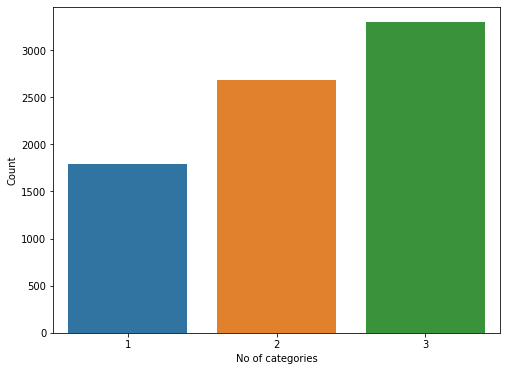

In [42]:
# Countplot of no_of_category
plt.figure(figsize = (8,6))
sns.countplot(data=df,x='no_of_category')
plt.xlabel("No of categories")
plt.ylabel("Count")

Majority of the content is listed under three different categories.
The content falling under just one category is about one third of the total data.

## **Top Actors**

In [43]:
df['cast'] = df['cast'].apply(lambda x : x.split(','))

In [44]:
cast_lst = []
for i in df['cast']:                                                            
  cast_lst +=i                                                                     

for i in range(len(cast_lst)): 
  cast_lst[i] = cast_lst[i].strip()                                                                                      

cast_dict = {}
for actor in cast_lst:                                                         
  if actor in cast_dict:
    cast_dict[actor] +=1
  else:
    cast_dict[actor] = 1

cast_dict = dict(sorted(cast_dict.items(), key=lambda item: item[1],reverse=True))

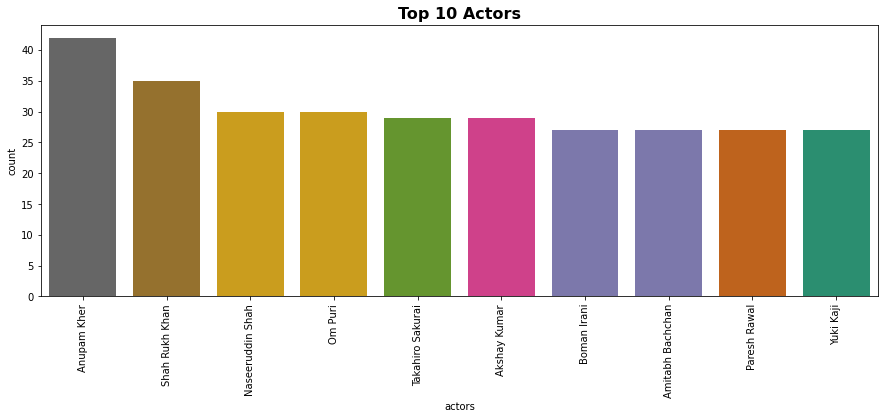

In [45]:
# top 10 actors
df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().rename(columns={'index':'actors', 0:'count'})[1:11]
plt.figure(figsize=(15,5))
sns.barplot(x='actors',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top 10 Actors",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

Top 10 actors based on the number of appearances in movies and TV shows consists of a majority of Indian actors like ‘Anupam Kher’, ‘Shah Rukh Khan’, ‘Naseeruddin Shah’, ‘Om Puri’, ‘Akshay Kumar’, ‘Boman Irani’, ‘Amitabh Bachchan’ and ‘Paresh Raval’.

## **Duration of Movies**

In [46]:
movie_duration = df.loc[df['type'] == 'Movie',['type','duration']]  
movie_duration['duration'] = movie_duration['duration'].apply(lambda x : int(x.split()[0])) 

Text(0.5, 1.0, 'Movie Duration')

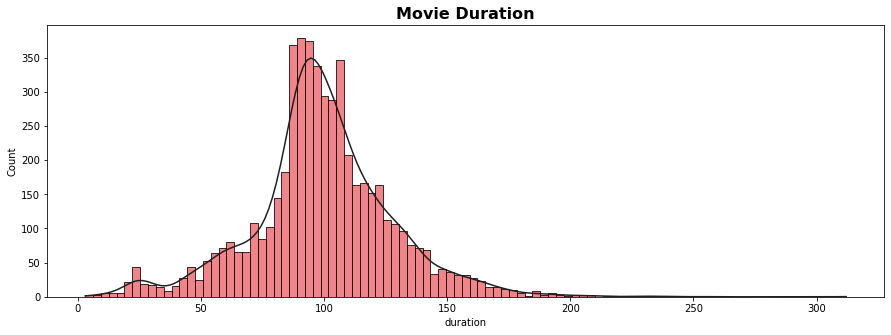

In [47]:
# movie lenth distribution
plt.figure(figsize=(15,5))
ax = sns.histplot(x='duration',data=movie_duration,kde=True,color="#e50914")
ax.lines[0].set_color('#221f1f')
plt.title("Movie Duration",size='16',fontweight="bold")

Observations:

Above histogram plot, we can see that the duration for Netflix movies closely resembles a normal distribution with the average viewing time spanning about 90 minutes which seems to make sense.
Most content are about 70 to 120 min duration for movies.

## **TV Show - Number of Seasons**

In [48]:
df.loc[df['type'] =='TV Show']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
5,s6,TV Show,46,Serdar Akar,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,...,A genetics professor experiments with a treatm...,2017,7,1,5,Adults,1,Turkey,"[International TV Shows, TV Dramas, TV Myste...",3
11,s12,TV Show,1983,Data unavailable,"[Robert Więckiewicz, Maciej Musiał, Michalin...","Poland, United States","November 30, 2018",2018,TV-MA,1 Season,...,"In this dark alt-history thriller, a naïve law...",2018,11,30,4,Adults,1,Poland,"[Crime TV Shows, International TV Shows, TV ...",3
12,s13,TV Show,1994,Diego Enrique Osorno,[Data unavailable],Mexico,"May 17, 2019",2019,TV-MA,1 Season,...,Archival video and new interviews examine Mexi...,2019,5,17,4,Adults,1,Mexico,"[Crime TV Shows, Docuseries, International T...",3
16,s17,TV Show,Feb-09,Data unavailable,"[Shahd El Yaseen, Shaila Sabt, Hala, Hanadi...",Data unavailable,"March 20, 2019",2018,TV-14,1 Season,...,"As a psychology professor faces Alzheimer's, h...",2019,3,20,2,Young Adults,1,Data unavailable,"[International TV Shows, TV Dramas]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7767,s7768,TV Show,Zindagi Gulzar Hai,Data unavailable,"[Sanam Saeed, Fawad Khan, Ayesha Omer, Mehr...",Pakistan,"December 15, 2016",2012,TV-PG,1 Season,...,"Strong-willed, middle-class Kashaf and carefre...",2016,12,15,3,Older Kids,1,Pakistan,"[International TV Shows, Romantic TV Shows, ...",3
7775,s7776,TV Show,Zoids Wild,Data unavailable,"[Kensho Ono, Takahiro Sakurai, Mikako Komats...",Japan,"August 14, 2020",2018,TV-Y7,1 Season,...,A quest for freedom and legendary treasure beg...,2020,8,14,4,Older Kids,1,Japan,"[Anime Series, Kids' TV]",2
7777,s7778,TV Show,Zombie Dumb,Data unavailable,[Data unavailable],Data unavailable,"July 1, 2019",2018,TV-Y7,2 Seasons,...,"While living alone in a spooky town, a young g...",2019,7,1,0,Older Kids,1,Data unavailable,"[Kids' TV, Korean TV Shows, TV Comedies]",3
7779,s7780,TV Show,Zona Rosa,Data unavailable,"[Manu NNa, Ana Julia Yeyé, Ray Contreras, P...",Mexico,"November 26, 2019",2019,TV-MA,1 Season,...,An assortment of talent takes the stage for a ...,2019,11,26,1,Adults,1,Mexico,"[International TV Shows, Spanish-Language TV ...",3


In [49]:
tvshow_seasons = df.loc[df['type'] == 'TV Show',['type','duration']] 
tvshow_seasons['duration'] = tvshow_seasons['duration'].apply(lambda x : int(x.split()[0]))

In [50]:
tvshow_seasons['duration'].value_counts().reset_index().rename(columns={'index':'seasons','duration':'count'})

,seasons,count
0,1,1606
1,2,378
2,3,183
3,4,86
4,5,57
5,6,30
6,7,19
7,8,18
8,9,8
9,10,5


Text(0.5, 0, 'Seasons')

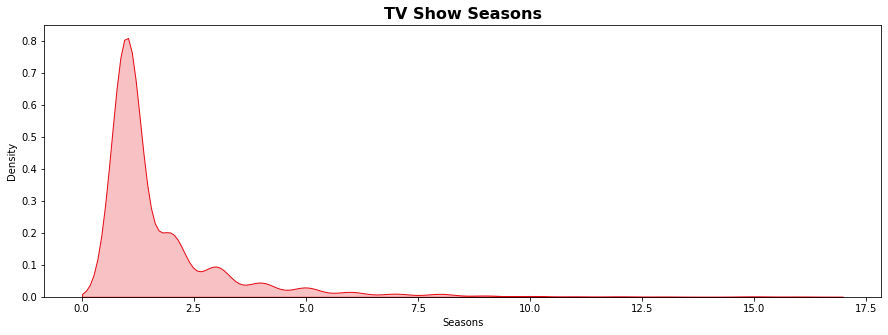

In [51]:
# TV show seasons distribution
plt.figure(figsize=(15,5))
ax = sns.kdeplot(x='duration',data=tvshow_seasons,color="#e50914",shade=True)
plt.title("TV Show Seasons",size='16',fontweight="bold")
plt.xlabel('Seasons')

Observation:

From above we see that Netflix TV shows on the other hand seems to be heavily skewed to the right or positively skewed where the majority of shows only have 1 season.

## **Contents produced in India**

In [52]:
#first 25 content in india
content_in_india = df.loc[(df['country']=='India') & (df['director']!='Data unavailable') ,['country','type','director',
                                                                                        'title','duration','release_year']].iloc[:25]

In [53]:
#visualization
import plotly.express as px
fig = px.treemap(content_in_india,path=['country','director'],color='director',
                 hover_data=['title','duration','type','release_year'],color_continuous_scale='Purples')
fig.show()

## **Wordcloud of Titles**

In [54]:
import matplotlib
from wordcloud import WordCloud,STOPWORDS
import matplotlib.cm as cm

In [55]:
#title string
text = str(list(df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')

In [56]:
# Custom colour map for Word cloud
cmap = cm.get_cmap('viridis', 8)

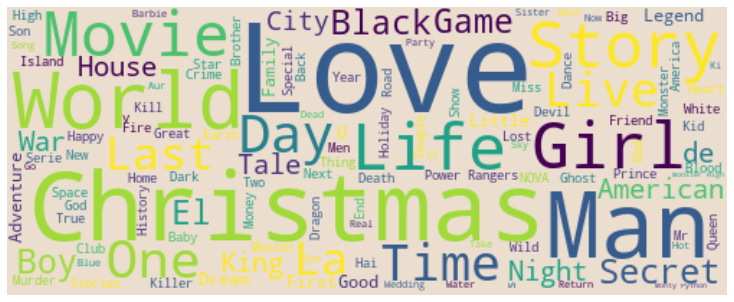

In [57]:
# Create stopword list:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = '#ebdecf', width = 500,  height = 200,colormap=cmap, max_words = 120).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Observations:
These words occur the majority of the time in the titles: ‘Movie’, ‘World’, ‘Man’, ‘Story’, ‘Love’, ‘Christmas’, ‘Day’ and ‘Girl’.

# **Natural Language Processing(NLP)**

## **1. Analyzing the feature: "description"**

In [58]:
#discription category of 1st row
df.description[0]

'In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

### **Removing the Punctuations**

In [59]:
#creating a function for removing punctuation 
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [60]:
#removing punctuation from discription column
df['description'] = df['description'].apply(remove_punctuation)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,In a future where the elite inhabit an island ...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,After a devastating earthquake hits Mexico Cit...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2


### **Removing the Stopwords**

In [61]:
#import nltk library for stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [62]:
# extracting the stopwords from nltk library
sw = nltk.corpus.stopwords.words('english')
#print number of stopwords
print("Number of stopwords in english : ", len(sw))
print('-'*50)
# displaying the stopwords
print('STOP WORDS: ',*sw)

Number of stopwords in english :  179
--------------------------------------------------
STOP WORDS:  i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't we

In [63]:
#function for removing stopwords
def remove_stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    #Method 1
    text1 = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text1)

In [64]:
#removing stopwords from discription
df['description'] = df['description'].apply( remove_stopwords )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,future elite inhabit island paradise far crowd...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,devastating earthquake hits mexico city trappe...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2


Now all the punctutations and stopwords are removed from discription column.

### **Count Vectorizer**

We will use this to transform the into a vector on the basis of the frequency of occurance.

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['description'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [66]:
dictionary = dict(dictionary)
# print(dictionary)

Creating a new DataFrame vocab_before_stemming

In [67]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [68]:
#print stemming word count
vocab_before_stemming.head(4)

,Word,count
18845,şeref,19585
10379,ōarai,19584
12367,łukasz,19583
11090,überelite,19582


In [69]:
#show top 20 stemming column
vocab_before_stemming.head(20).T

,18845,10379,12367,11090,11662,13273,6576,18183,10417,9859,19547,6528,19582,16402,7184,18385,19572,19579,10282,18059
Word,şeref,ōarai,łukasz,überelite,über,ömer,émile,ángel,álvaro,álex,zé,zurich,zumbo,zulu,zuhu,zuckerberg,zoé,zozo,zoya,zorro
count,19585,19584,19583,19582,19581,19580,19579,19578,19577,19576,19575,19574,19573,19572,19571,19570,19569,19568,19567,19566


In [70]:
#show bottom 4 stemming table
vocab_before_stemming.tail(4)

,Word,count
639,100,3
7608,10,2
7954,009,1
6859,007,0


### **Most occurred words**

In [71]:
#top15 occured vocab
top15_most_occurred_vocab = vocab_before_stemming.head(15)

In [72]:
#print top 15 most occured words
top15_most_occurred_words = top15_most_occurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelite', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [73]:
#count the values of top 15 most occured words
top15_most_occurred_word_count = top15_most_occurred_vocab['count'].values
top15_most_occurred_word_count

array([19585, 19584, 19583, 19582, 19581, 19580, 19579, 19578, 19577,
       19576, 19575, 19574, 19573, 19572, 19571])

<BarContainer object of 15 artists>

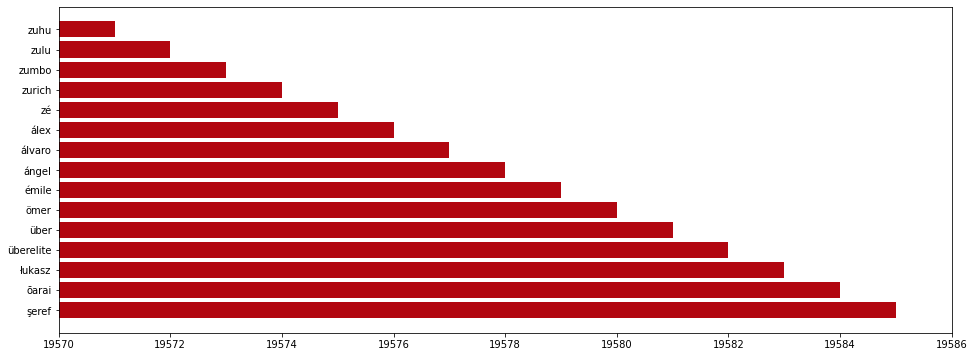

In [74]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(19570, 19586)
plt.barh(top15_most_occurred_words ,top15_most_occurred_word_count,color="#b20710")

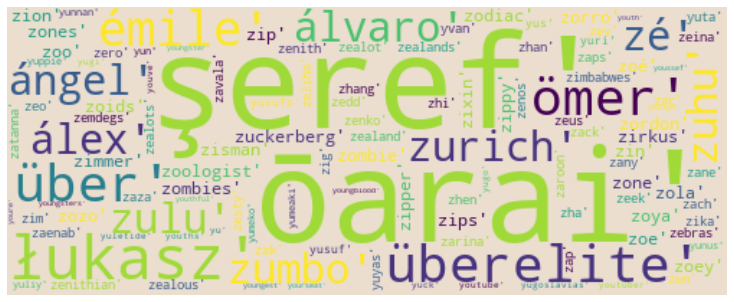

In [75]:
# Word Cloud for Description Column before Stemming
text = str(list(vocab_before_stemming['Word']))
cmap = cm.get_cmap('viridis', 8)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = '#ebdecf', width = 500,  height = 200,colormap=cmap, max_words = 120).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Snowball Stemmer**

To reduce the words to their root word.

In [76]:
from nltk.stem.snowball import SnowballStemmer
# Create an object of stemming function
stemmer = SnowballStemmer("english")

In [77]:
# Funtion to apply stemming
def Apply_stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [78]:
#Stemming for description
df['description'] = df['description'].apply(Apply_stemming )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,futur elit inhabit island paradis far crowd sl...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,devast earthquak hit mexico citi trap survivor...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2


### **TF-IDF Vectorizer**

In [79]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['description'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [80]:
dictionary = dict(dictionary)
# print(dictionary)

In [81]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming = vocab_after_stemming.sort_values("count" ,ascending=False)

### **Most occurred words**

In [82]:
#top15 occured vocab
top15_most_occurred_vocab = vocab_after_stemming.head(15)

In [83]:
top15_most_occurred_words = top15_most_occurred_vocab.Word.values 
top15_most_occurred_words

array(['şeref', 'ōarai', 'łukasz', 'überelit', 'über', 'ömer', 'émile',
       'ángel', 'álvaro', 'álex', 'zé', 'zurich', 'zumbo', 'zulu', 'zuhu'],
      dtype=object)

In [84]:
top15_most_occurred_word_count = top15_most_occurred_vocab['count'].values
top15_most_occurred_word_count

array([14233, 14232, 14231, 14230, 14229, 14228, 14227, 14226, 14225,
       14224, 14223, 14222, 14221, 14220, 14219])

<BarContainer object of 15 artists>

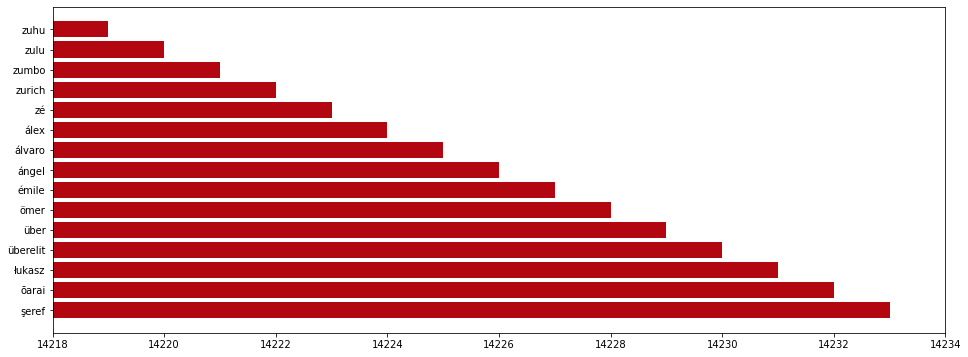

In [85]:
plt.figure( figsize = ( 16,6 ))
plt.xlim(14218, 14234)
plt.barh(top15_most_occurred_words ,top15_most_occurred_word_count ,color="#b20710")

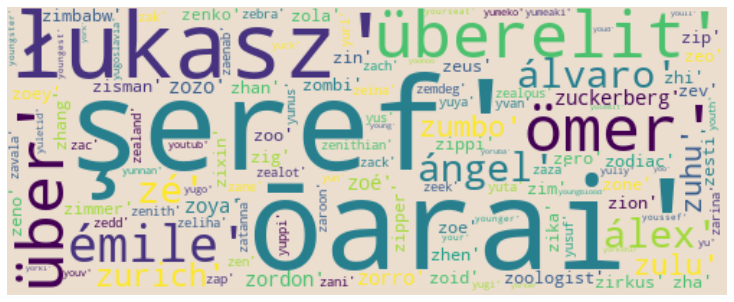

In [86]:
# Word Cloud for Description Column after Stemming
text = str(list(vocab_after_stemming['Word']))
cmap = cm.get_cmap('viridis', 8)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = '#ebdecf', width = 500,  height = 200,colormap=cmap, max_words = 120).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Adding a new feature to hold the length of description**

In [87]:
#creating new column name length
df['Length(description)'] = df['description'].apply(lambda x: len(x))
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011,R,78 min,...,2018,12,20,3,Adults,1,Singapore,"[Horror Movies, International Movies]",2,102


In [88]:
#print 1st row content from description 
df.description[0]

'futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

## **2. Analyzing the feature: "listed_in"**

### **Removing punctuation and stopwords**

In [89]:
#removing punctuation and stop words
df['listed_in'] = df['listed_in'].apply(remove_punctuation)
df['listed_in'] = df['listed_in'].apply( remove_stopwords )
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2,88


### **Count Vectorizer**

In [90]:
# Create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(df['listed_in'])
# Collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items()

In [91]:
dictionary = dict(dictionary)
# print(dictionary)

Creating a new DataFrame vocab_before_stemming

In [92]:
# Store the count in panadas dataframe with vocab as index
vocab_before_stemming = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_before_stemming = vocab_before_stemming.sort_values("count" ,ascending=False)

In [93]:
#print stemming word count
vocab_before_stemming.head(4)

,Word,count
1,tv,41
12,thrillers,40
40,teen,39
39,talk,38


In [94]:
#show top 20 stemming column
vocab_before_stemming.head(20).T

,1,12,40,39,37,16,30,32,2,19,4,22,21,20,23,11,27,26,6,28
Word,tv,thrillers,teen,talk,standup,sports,spirituality,spanishlanguage,shows,series,scifi,science,romantic,reality,nature,mysteries,musicals,music,movies,lgbtq
count,41,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22


In [95]:
#show bottom 4 stemming table
vocab_before_stemming.tail(4)

,Word,count
24,british,3
18,anime,2
9,adventure,1
8,action,0


### **Most Occurred Words**

In [96]:
# variable for top 15 most occured vocab in listed_in
top15_most_ocurred_vocab_listed_in = vocab_before_stemming.head(15)

In [97]:
#top 15 most occured vocab in listed_in
top15_most_ocurred_words_listed_in = top15_most_ocurred_vocab_listed_in.Word.values 
top15_most_ocurred_words_listed_in

array(['tv', 'thrillers', 'teen', 'talk', 'standup', 'sports',
       'spirituality', 'spanishlanguage', 'shows', 'series', 'scifi',
       'science', 'romantic', 'reality', 'nature'], dtype=object)

In [98]:
#print top 15 most occured vocab count from listed_in
top15_most_occurred_words_in_listed_in_count = top15_most_ocurred_vocab_listed_in['count'].values 
top15_most_occurred_words_in_listed_in_count

array([41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27])

<BarContainer object of 15 artists>

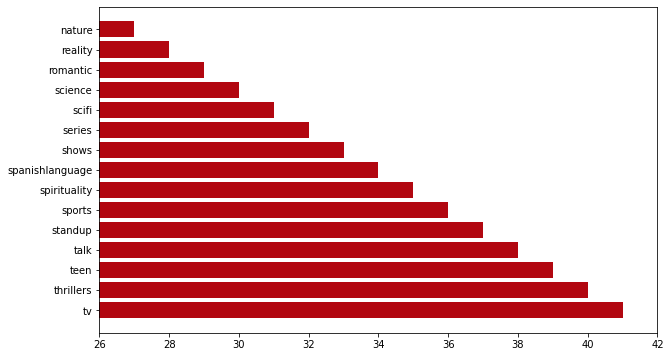

In [99]:
#bar plot for top 15 words from listed_in
plt.figure( figsize = ( 10,6 ))
plt.xlim(26, 42 )
plt.barh(top15_most_ocurred_words_listed_in , top15_most_occurred_words_in_listed_in_count,color="#b20710")

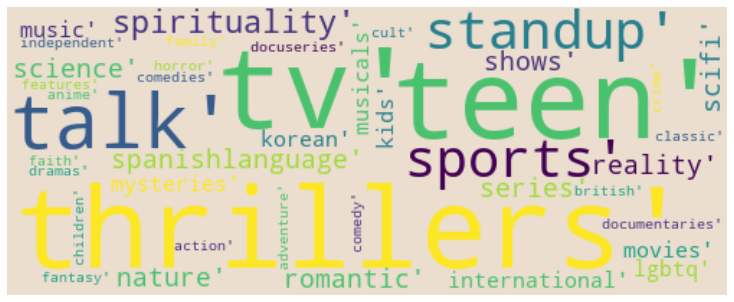

In [100]:
# Word Cloud for Listed_in Column before Stemming
text = str(list(vocab_before_stemming['Word']))
cmap = cm.get_cmap('viridis', 8)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = '#ebdecf', width = 500,  height = 200,colormap=cmap, max_words = 120).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Snowball Stemmer**

In [101]:
#Stemming for description
df['listed_in'] = df['listed_in'].apply( Apply_stemming )
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,added_year,added_month,added_day,added_weekday,age_group,count,first_country,Listed_in,no_of_category,Length(description)
0,s1,TV Show,3%,Data unavailable,"[João Miguel, Bianca Comparato, Michel Gomes...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,2020,8,14,4,Adults,1,Brazil,"[International TV Shows, TV Dramas, TV Sci-F...",3,82
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,2016,12,23,4,Adults,1,Mexico,"[Dramas, International Movies]",2,88
2,s3,Movie,23:59,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",Singapore,"December 20, 2018",2011,R,78 min,...,2018,12,20,3,Adults,1,Singapore,"[Horror Movies, International Movies]",2,102


### **TF-IDF Vectorizer**

In [102]:
# Create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer()

# Fit the vectorizer using the text data
tfid_vectorizer.fit(df['listed_in'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [103]:
#print dictionary variable 
dictionary = dict(dictionary)
# print(dictionary)

In [104]:
# Store the count in panadas dataframe with vocab as index
vocab_after_stemming_listed_in = pd.DataFrame({"Word": dictionary.keys() ,
                                      "count" :dictionary.values()})
# Sort the dataframe
vocab_after_stemming_listed_in = vocab_after_stemming_listed_in.sort_values("count" ,ascending=False)

### **Most Occurred Words**

In [105]:
#top15 occured vocab
top15_most_occurred_vocab_listed_in = vocab_after_stemming_listed_in.head(15)

In [106]:
top15_most_occurred_vocab_listed_in_word = top15_most_occurred_vocab_listed_in.Word.values 
top15_most_occurred_vocab_listed_in_word

array(['tv', 'thriller', 'teen', 'talk', 'standup', 'sport', 'spiritu',
       'spanishlanguag', 'show', 'seri', 'scifi', 'scienc', 'romant',
       'realiti', 'natur'], dtype=object)

In [107]:
top15_most_occurred_vocab_listed_in_count = top15_most_occurred_vocab_listed_in['count'].values
top15_most_occurred_vocab_listed_in_count

array([39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25])

<BarContainer object of 15 artists>

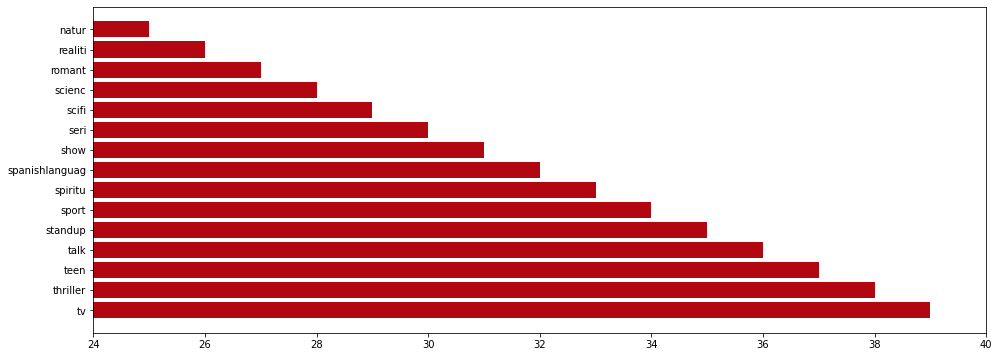

In [108]:
#bar graph after stemming of listed_in category
plt.figure( figsize = ( 16,6 ))
plt.xlim(24, 40 )
plt.barh(top15_most_occurred_vocab_listed_in_word , top15_most_occurred_vocab_listed_in_count,color="#b20710")

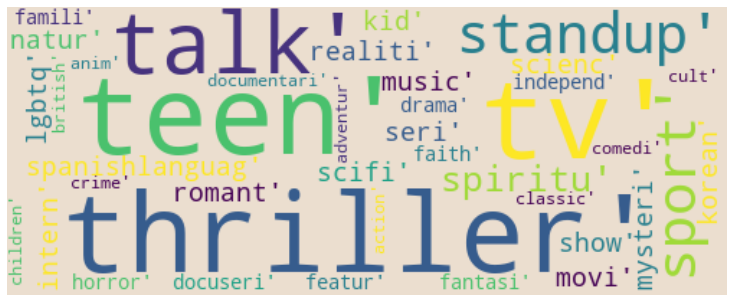

In [109]:
# Word Cloud for Listed_in Column after Stemming
text = str(list(vocab_after_stemming_listed_in['Word']))
cmap = cm.get_cmap('viridis', 8)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,background_color = '#ebdecf', width = 500,  height = 200,colormap=cmap, max_words = 120).generate(text)
plt.figure( figsize=(10,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### **Adding a new feature to hold the length of listed_in** 

In [110]:
#new column for listed_in length
df['Length(listed-in)'] = df['listed_in'].apply(lambda x: len(x))
df[['description', 'Length(description)', 'listed_in' ,'Length(listed-in)' ]].head(3)

,description,Length(description),listed_in,Length(listed-in)
0,futur elit inhabit island paradis far crowd sl...,82,intern tv show tv drama tv scifi fantasi,40
1,devast earthquak hit mexico citi trap survivor...,88,drama intern movi,17
2,armi recruit found dead fellow soldier forc co...,102,horror movi intern movi,23


# **Applying Clustering Algorithms**

In [111]:
#features taking for clustering
X_features_rec = df[['no_of_category' ,'Length(description)','Length(listed-in)']]
X_features_rec.describe()  

,no_of_category,Length(description),Length(listed-in)
count,7770.000000,7770.000000,7770.000000
mean,2.193308,93.012484,24.342085
std,0.785836,10.775430,10.677661
min,1.000000,25.000000,4.000000
25%,2.000000,87.000000,17.000000
50%,2.000000,93.000000,24.000000
75%,3.000000,100.000000,32.000000
max,3.000000,185.000000,62.000000


In [112]:
from sklearn import preprocessing
#scaling x features
stdscaler = preprocessing.StandardScaler()
X_rescale=stdscaler.fit_transform(X_features_rec)
X=X_rescale

## **K-MEANS clustering**

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [114]:
#store silhouette score corresponding no. of clusters
no_cluster_silhouette_score = {}

For n_clusters = 2 The average silhouette_score is : 0.42843328899854627
For n_clusters = 3 The average silhouette_score is : 0.3832991558393045
For n_clusters = 4 The average silhouette_score is : 0.37431547662296216
For n_clusters = 5 The average silhouette_score is : 0.3720843918336816
For n_clusters = 6 The average silhouette_score is : 0.3683935727757619
For n_clusters = 7 The average silhouette_score is : 0.3759188611985892
For n_clusters = 8 The average silhouette_score is : 0.3529435800136665
For n_clusters = 9 The average silhouette_score is : 0.37355481904677795
For n_clusters = 10 The average silhouette_score is : 0.36466585189849926
For n_clusters = 11 The average silhouette_score is : 0.3556771542933465
For n_clusters = 12 The average silhouette_score is : 0.354922889695617
For n_clusters = 13 The average silhouette_score is : 0.3510103258811644
For n_clusters = 14 The average silhouette_score is : 0.3479317051389534
For n_clusters = 15 The average silhouette_score is : 0.

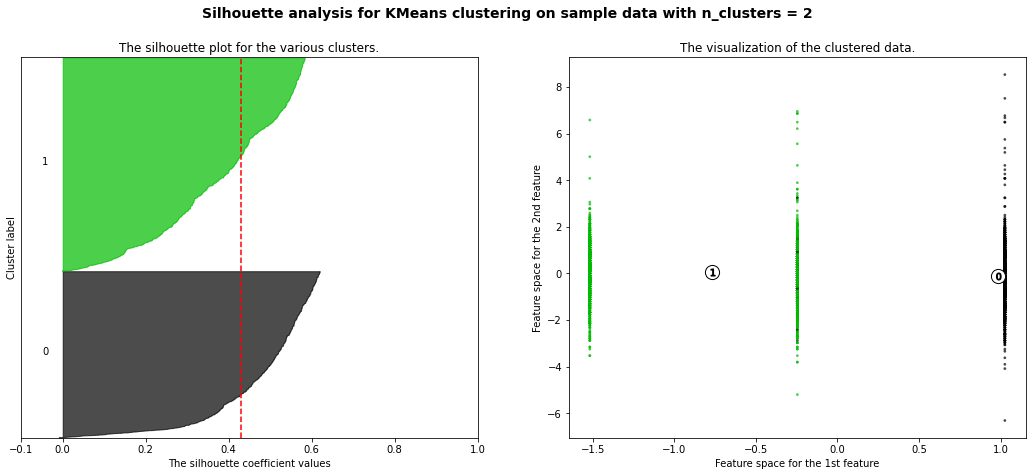

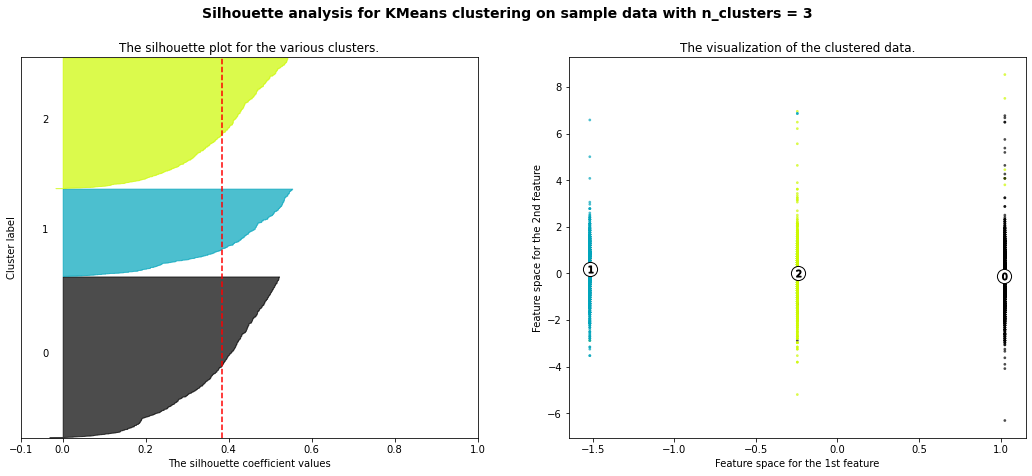

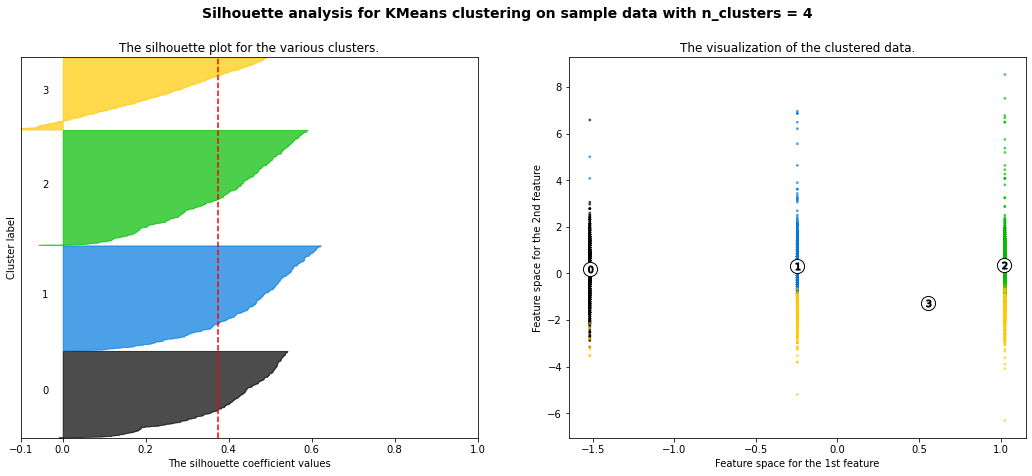

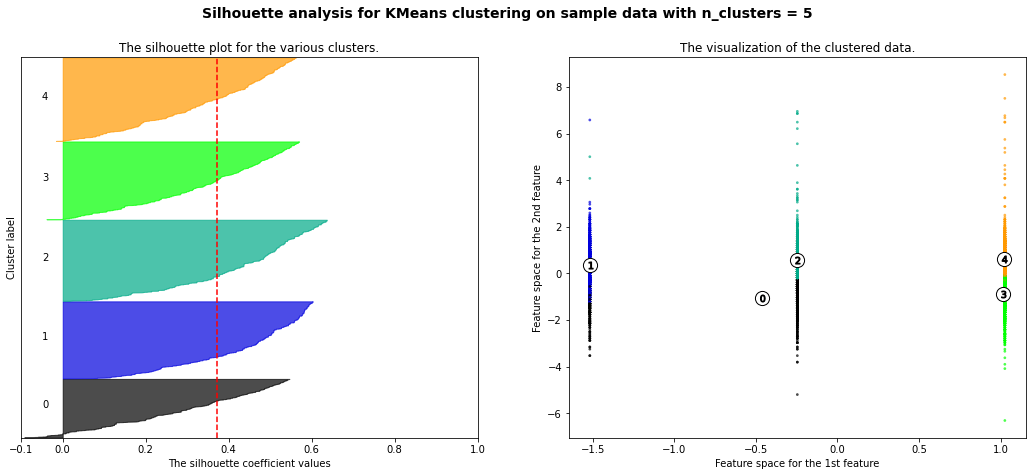

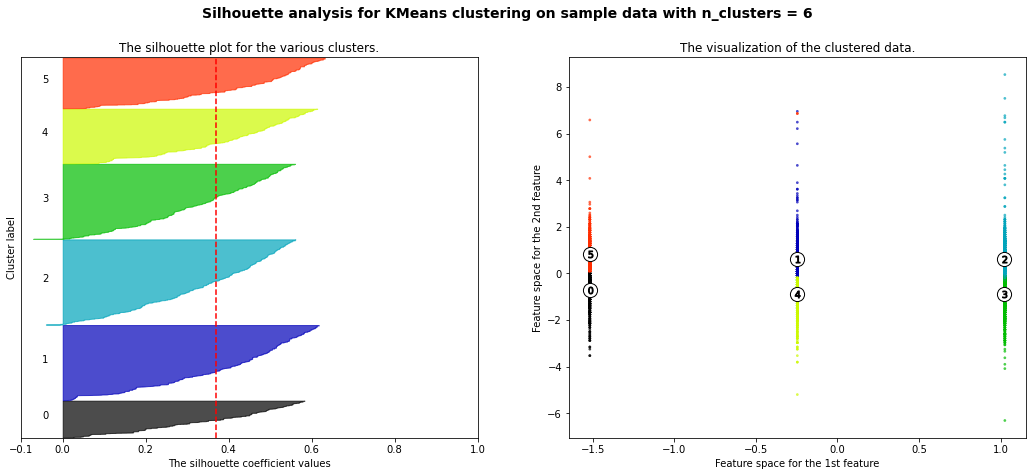

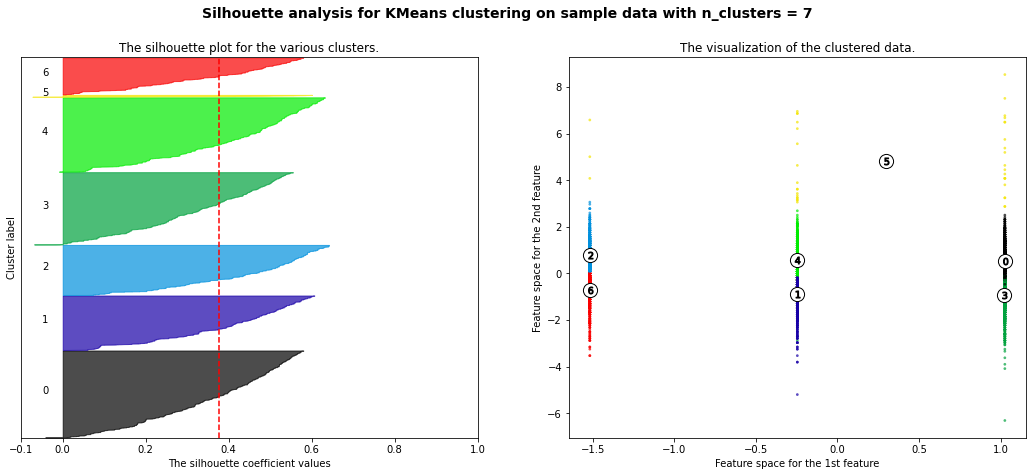

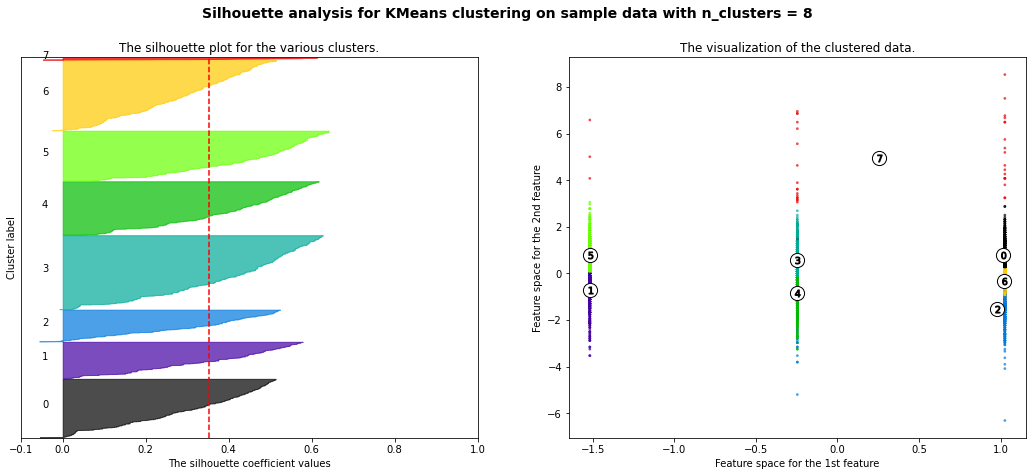

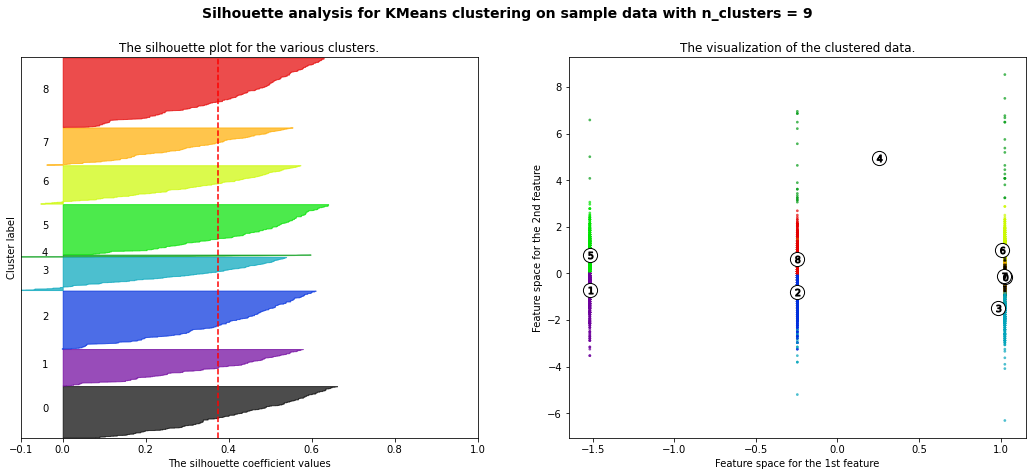

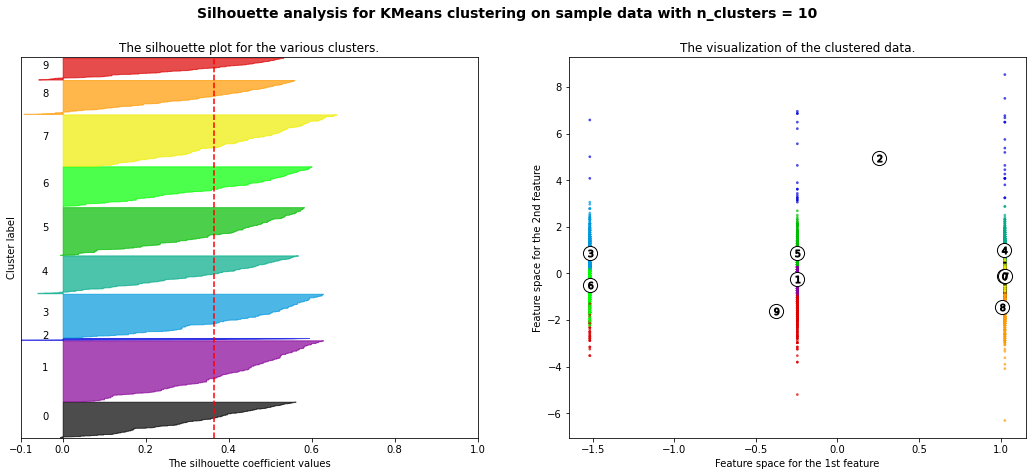

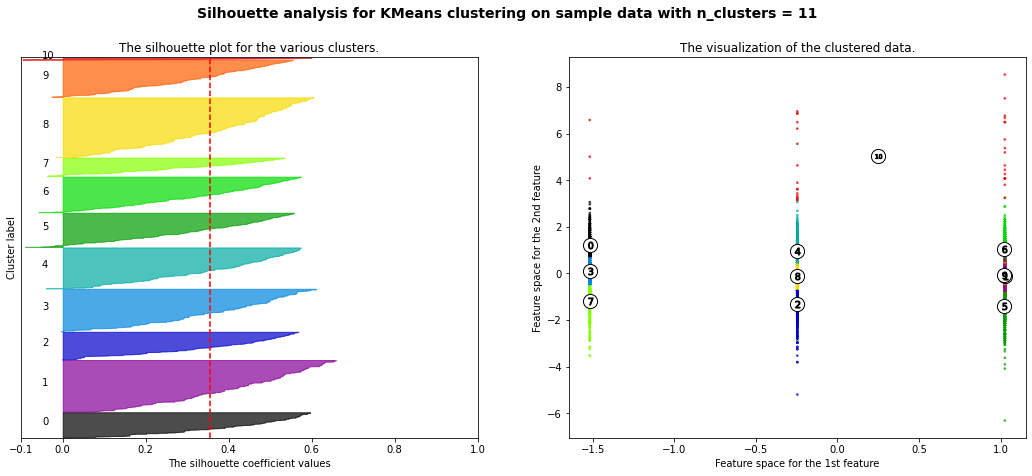

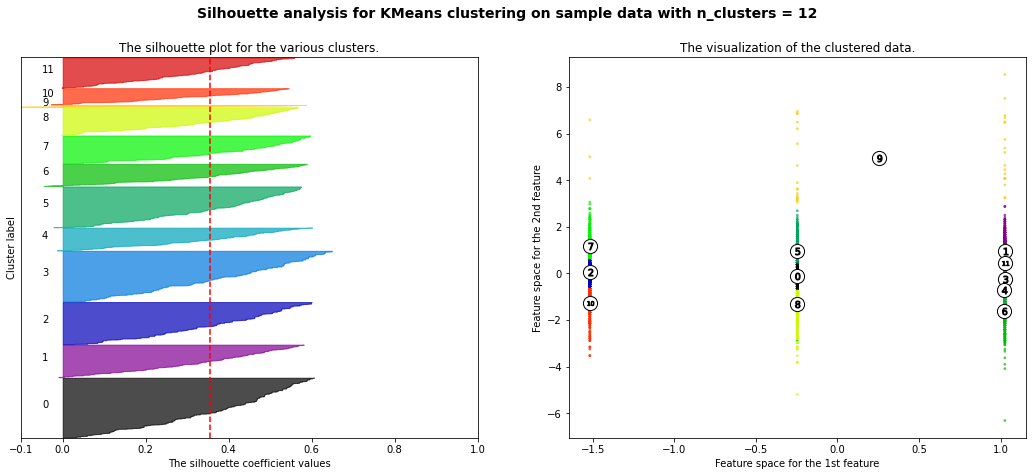

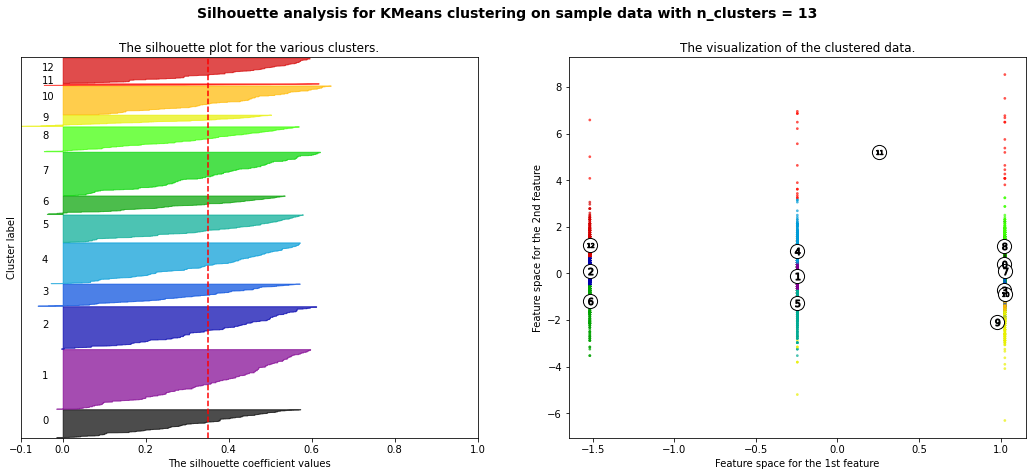

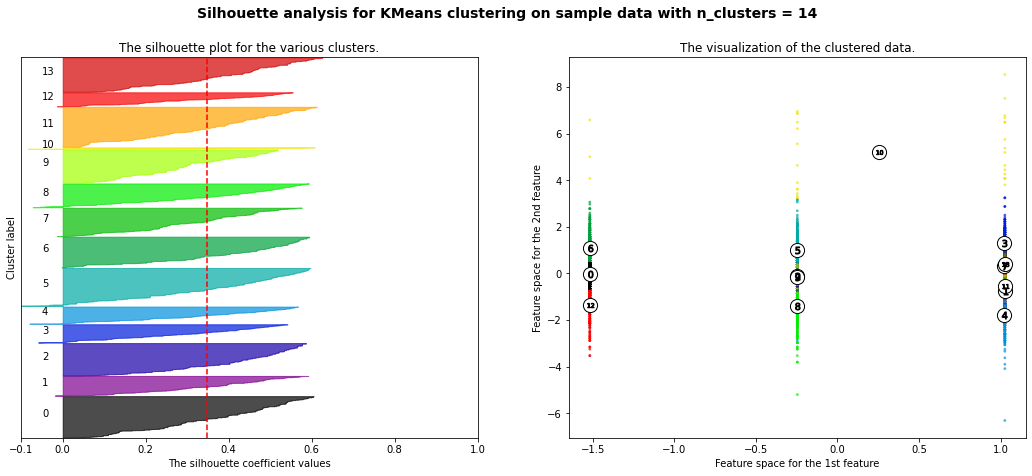

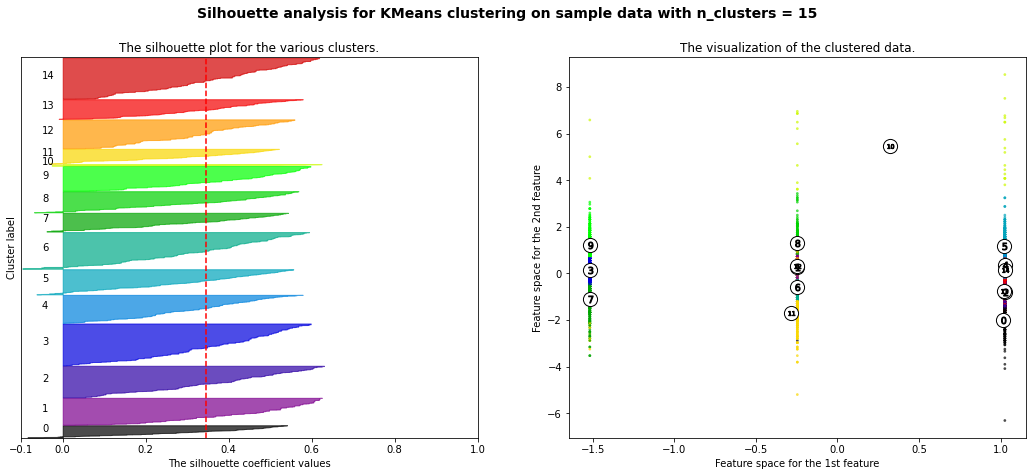

In [115]:
#range_n_clusters = [2, 3, 4, 5, 6]
range_n_clusters = list(range(2,16))

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    no_cluster_silhouette_score[n_clusters] = round(silhouette_avg,3)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [116]:
from prettytable import PrettyTable

In [117]:
columns = ['n_clusters','silhouette_score']                                #column_names 
myTable = PrettyTable()                                                    #creating object
myTable.add_column(columns[0],list(no_cluster_silhouette_score.keys()))    #n_clusters
myTable.add_column(columns[1],list(no_cluster_silhouette_score.values()))  #silhouette score
print(myTable)

+------------+------------------+
| n_clusters | silhouette_score |
+------------+------------------+
|     2      |      0.428       |
|     3      |      0.383       |
|     4      |      0.374       |
|     5      |      0.372       |
|     6      |      0.368       |
|     7      |      0.376       |
|     8      |      0.353       |
|     9      |      0.374       |
|     10     |      0.365       |
|     11     |      0.356       |
|     12     |      0.355       |
|     13     |      0.351       |
|     14     |      0.348       |
|     15     |      0.344       |
+------------+------------------+


### **Elbow Method**

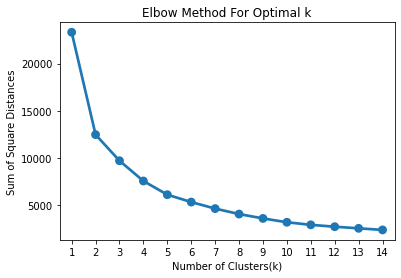

In [118]:
#Elbow Method For Optimal k
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Here, the elbow appears to give two options, i.e. 2 and 3 clusters.

### **Dendogram**

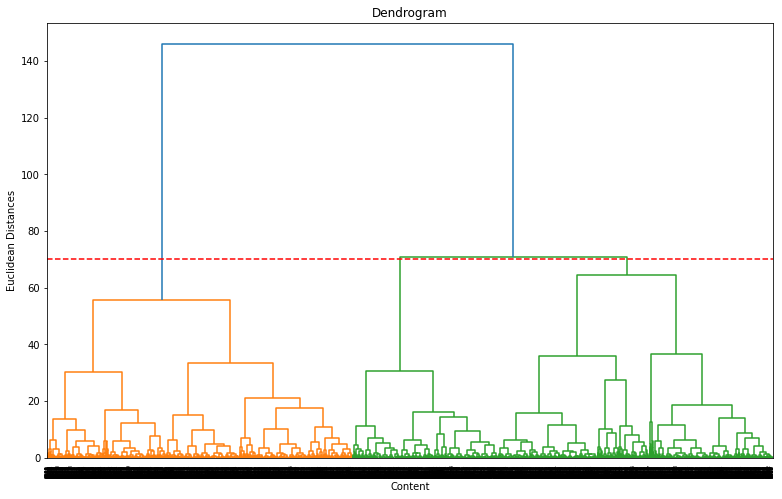

In [119]:
# Let's import sch
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Content')
plt.ylabel('Euclidean Distances')
plt.axhline(y=70,color='r', linestyle='--')
plt.show()   

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold

No. of Cluster = 3

## **AgglomerativeClustering**

In [120]:
# Let's  import AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

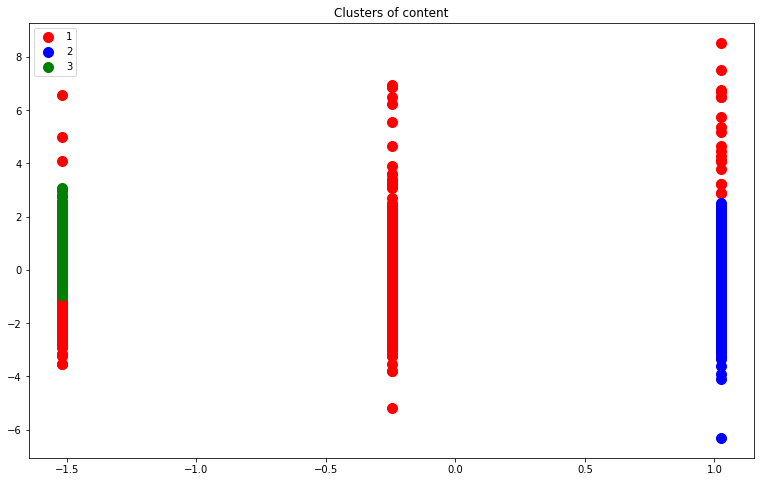

In [121]:
# Visualizing the clusters (three dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = '1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = '2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = '3')

plt.title('Clusters of content')

plt.legend()
plt.show()

In [122]:
np.unique(y_hc,return_counts=True)

(array([0, 1, 2]), array([2937, 3275, 1558]))

# **Conclusion:**

From this exercise  we can conclude that:
1. The available data consists of 69.1% of titles corresponding to movies and the rest 30.9% to TV Shows. Thus, movies as a category of content dominate the quantity in this dataset.
2. Looking at the data from release year 2001 to 2018, the number of movies and TV shows released has observed an exponential rise, with a major break through observed in the year 2014-2015
3. We can also observe that the amount of movies released has been about 2 to 3 times the amount of TV shows released. However, it is evident that this ratio started to reduce from the year 2019. Thus the demand for the TV shows started to peak up from the year 2017 and impacted the production criteria by the year 2019.
4. However, the content started to get on the Netflix platform in mass from the year 2015 - 2016.
5. Looking at the month wise distribution of the data added to the platform, we observe that the  number of movies and TV shows added, observed a downward trend from the month of March till July. A reason to speculate could be the fiscal year. The headquarters of Netflix is located in Los Gatos, California, U.S., where the fiscal year is from July to June.
6. Majority of the content producers were from the USA, followed by India, UK and Japan. Also, a majority of the data seems to lack information on the country of origin hence that ambiguity holds true while still not affecting the outcome of our observation.
7. The UK, Japan and South Korea are the only countries where the total number of TV shows produced is more than the number of movies produced.
8. Of all the top content producer nations, India appears to have the least contribution for TV Shows.
9. Of the top directors with the majority of content in the dataset, we observe that “Raul Campos” and “Jan Sulter” top the list with their contribution to movies only. Among these top 15 directors only three directors namely, “Marcus Raboy”, “Quentin Tarantino” and “Ryan Polito” are found to have contributed for both movies and TV shows.
10. Observation for Ratings:
TV Shows do not have ratings: 'R', 'PG-13', 'PG', 'NR' and 'G'. The maximum content in the dataset has a rating of 'TV-14' followed by 'TV-PG' & 'R'. 'TV-Y7-FV', 'UR' and 'NC-17' seem to have less or almost no content listed with them.
11. We could say that the majority of the content here is for adults and young adults. Very little content is available for kids.
12. We see that the proportion of target audience based on the type of content produced by the USA, UK and France is nearly the same. A similar trait was observed for India and Japan. Apparently the cultural beliefs of these two groups are quite closely similar and this is reflected in the type of content produced.
13. The most popular genre is ‘Drama’ followed by ‘Comedy’ and ‘International TV Shows’.
14. Top 10 actors based on the number of appearances in movies and TV shows consists of a majority of Indian actors like ‘Anupam Kher’, ‘Shah Rukh Khan’, ‘Naseeruddin Shah’, ‘Om Puri’, ‘Akshay Kumar’, ‘Boman Irani’, ‘Amitabh Bachchan’ and ‘Paresh Raval’.
15. The duration of movies appears to be a near normal distribution with the mean duration of 90 minutes. Looking at the number of seasons for the TV shows, it appears that  the majority of the shows have only one season. Hence, the plot is heavily skewed towards the left.
16. These words occur the majority of the time in the titles: ‘Movie’, ‘World’, ‘Man’, ‘Story’, ‘Love’, ‘Christmas’, ‘Day’ and ‘Girl’.
17. We applied two clustering algorithms namely K- Means and Agglomerative clustering algorithm. The best cluster arrangement we obtained was three.
